## Importing Libraris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.naive_bayes import GaussianNB

## Data Extraction

In [3]:
TRAIN_PATH = r'../../Datasets/train.csv'
TEST_PATH = r'../../Datasets/test.csv'
SAMPLE_SUBMISSION_PATH = r"../../Datasets/sample_submission.csv"

In [4]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

## EDA

### Checking information of the datasets

In [5]:
print(train_df.shape)
print(test_df.shape)

(26570, 26)
(20775, 25)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [7]:
display(train_df.head())
display(test_df.head())

id product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
0   0            A    80.10  material_7  material_8            9            5   
1   1            A    84.89  material_7  material_8            9            5   
2   2            A    82.43  material_7  material_8            9            5   
3   3            A   101.07  material_7  material_8            9            5   
4   4            A   188.06  material_7  material_8            9            5   

   measurement_0  measurement_1  measurement_2  ...  measurement_9  \
0              7              8              4  ...         10.672   
1             14              3              3  ...         12.448   
2             12              1              5  ...         12.715   
3             13              2              6  ...         12.471   
4              9              2              8  ...         10.337   

   measurement_10  measurement_11  measurement_12  measurement_13  \
0          15.859          17.594          15.193          15.029   
1          17.947          17.915          11.755          14.732   
2          15.607             NaN          13.798          16.711   
3          16.346          18.377          10.020          15.250   
4          17.082          19.932          12.428          16.182   

   measurement_14  measurement_15  measurement_16  measurement_17  failure  
0             NaN          13.034          14.684         764.100        0  
1          15.425          14.395          15.631         682.057        0  
2          18.631          14.094          17.946         663.376        0  
3          15.562          16.154          17.172         826.282        0  
4          12.760          13.153          16.412         579.885        0  

[5 rows x 26 columns]

id product_code  loading attribute_0 attribute_1  attribute_2  \
0  26570            F   119.57  material_5  material_6            6   
1  26571            F   113.51  material_5  material_6            6   
2  26572            F   112.16  material_5  material_6            6   
3  26573            F   112.72  material_5  material_6            6   
4  26574            F   208.00  material_5  material_6            6   

   attribute_3  measurement_0  measurement_1  measurement_2  ...  \
0            4              6              9              6  ...   
1            4             11              8              0  ...   
2            4              8             12              4  ...   
3            4              8             11             10  ...   
4            4             14             16              8  ...   

   measurement_8  measurement_9  measurement_10  measurement_11  \
0         18.654         10.802          15.909          18.070   
1         19.368         12.032          13.998             NaN   
2         17.774         11.743          17.046          18.086   
3         18.948         11.790          18.165          16.163   
4         19.141         12.370          14.578          17.849   

   measurement_12  measurement_13  measurement_14  measurement_15  \
0          13.772          13.659          16.825          13.742   
1          12.473          17.468          16.708          14.776   
2          10.907          13.363          15.737          17.065   
3          10.933          15.501          15.667          12.620   
4          11.941          16.070          16.183          13.324   

   measurement_16  measurement_17  
0          17.710         634.612  
1          14.102         537.037  
2          16.021         658.995  
3          16.111         594.301  
4          17.150         801.044  

[5 rows x 25 columns]

### Feature Groupping

In [8]:
# Mengelompokkan beberapa feature
measurement_cols = [i for i in train_df.columns if "measurement" in i]
measurement_int_cols = [i for i in measurement_cols if train_df[i].dtype == np.int64]
measurement_float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
attribute_cols = [i for i in train_df.columns if "attribute" in i]

### Missing Data

<Axes: xlabel='missing values', ylabel='column'>

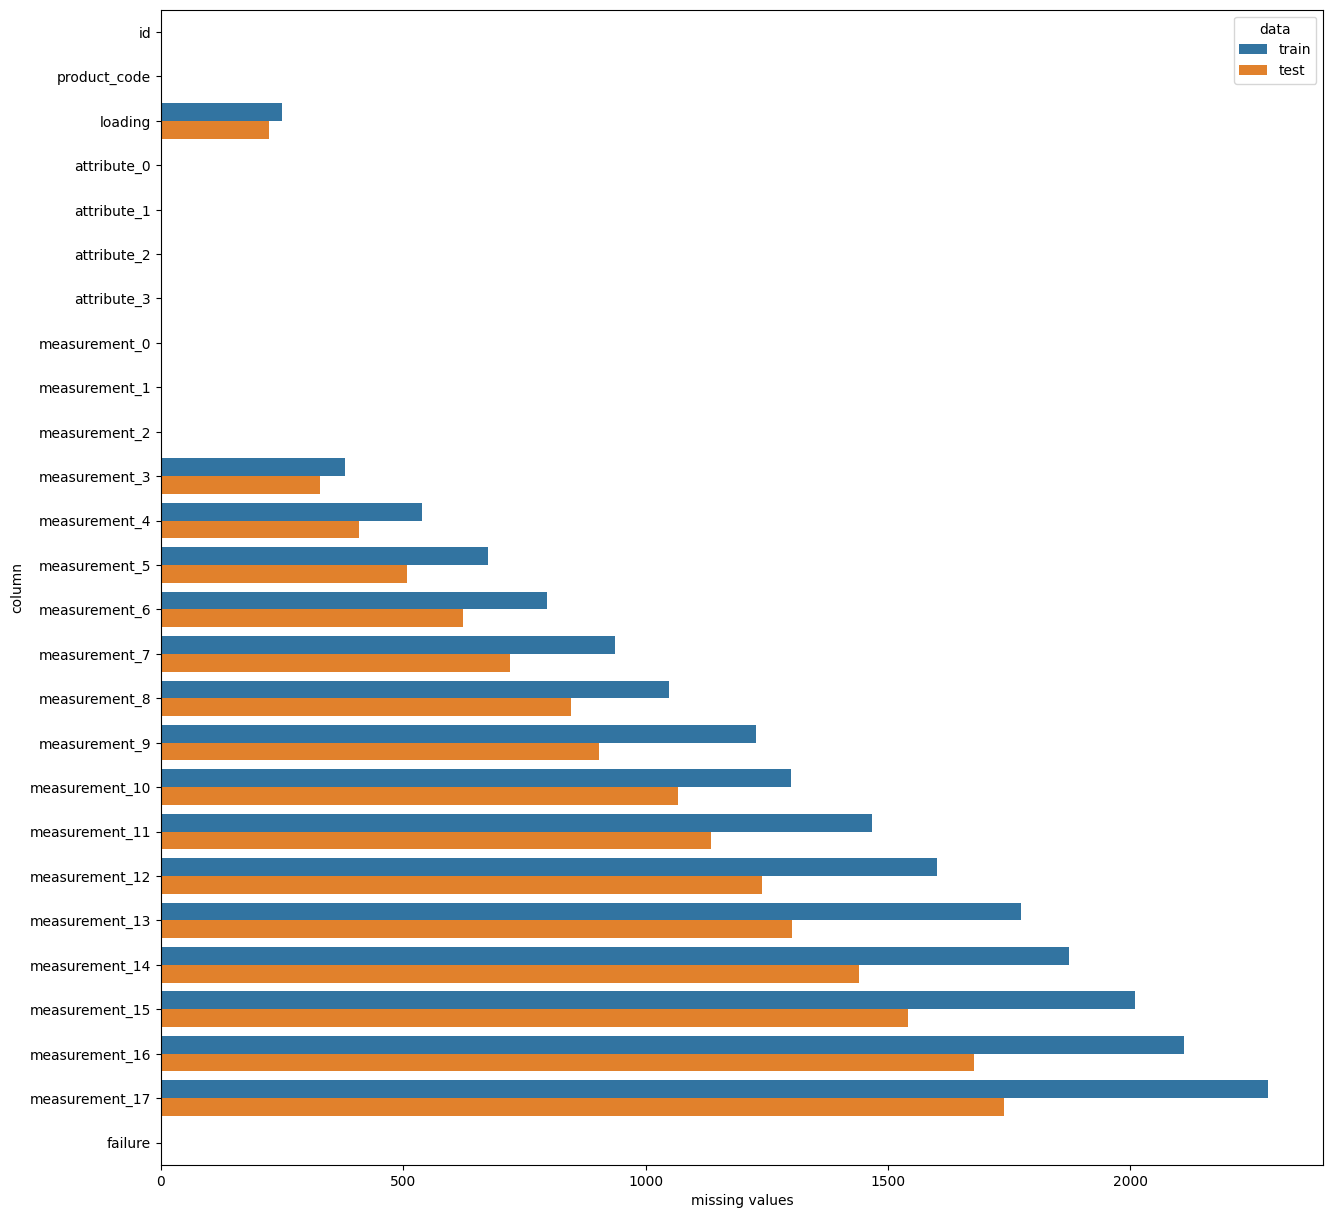

In [9]:
missing_values = pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=1)
#display(missing_values)
missing_values = pd.concat([train_df.isna().sum(), test_df.isna().sum()], axis=0).rename("missing values").reset_index().rename(columns={"index":"column"})
missing_values["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
f,ax = plt.subplots(figsize=(15,15))
sns.barplot(data = missing_values, y="column", x="missing values", hue="data", orient="h")

- Observasi:

1. Semua feature dengan value float mempunyai missing values

2. Train set dan test set mempunyai persentase yang sama dalam missing value

### Target - Failure of the product

In [10]:
value_count = train_df["failure"].value_counts()
value_count

failure
0    20921
1     5649
Name: count, dtype: int64

- Observasi
1. Persebaran kelas pada target(failure) tidak seimbang dimana kelas failure jauh lebih jarang terjadi dibandingkan dengan non failure.

### Categorical columns

#### Product code

In [11]:
value_count_product_code = train_df["product_code"].value_counts()
value_count_product_code

product_code
C    5765
E    5343
B    5250
D    5112
A    5100
Name: count, dtype: int64

In [12]:
value_count_product_code_test = test_df["product_code"].value_counts()
value_count_product_code_test

product_code
F    5422
I    5228
G    5107
H    5018
Name: count, dtype: int64

- Observasi
1. Product code dalam train set berbeda dengan test set
2. Jumlah kemunculan setiap product code kurang lebih sama 

#### Atribute 0

In [13]:
value_count_attribute0 = train_df["attribute_0"].value_counts()
value_count_attribute0

attribute_0
material_7    21320
material_5     5250
Name: count, dtype: int64

In [14]:
value_count_attribute0_test = test_df["attribute_0"].value_counts()
value_count_attribute0_test

attribute_0
material_5    10529
material_7    10246
Name: count, dtype: int64

- Observasi
1. attribute_0 mempunyai distribusi nilai yang berbeda dalam train dan test

#### Atribute 1

In [15]:
value_count_attribute1 = train_df["attribute_1"].value_counts()
value_count_attribute1

attribute_1
material_8    10865
material_5    10362
material_6     5343
Name: count, dtype: int64

In [16]:
value_count_attribute2 = train_df["attribute_2"].value_counts()
value_count_attribute2

attribute_2
6    10455
5     5765
8     5250
9     5100
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

In [17]:
value_count_attribute3 = train_df["attribute_3"].value_counts()
value_count_attribute3

attribute_3
8    11015
9     5343
6     5112
5     5100
Name: count, dtype: int64

In [18]:
value_count_attribute3_test = test_df["attribute_3"].value_counts()
value_count_attribute3_test

attribute_3
4    5422
5    5228
7    5107
9    5018
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

### Product code and attribute values

In [19]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].nunique()

attribute_0  attribute_1  attribute_2  attribute_3
product_code                                                    
A                       1            1            1            1
B                       1            1            1            1
C                       1            1            1            1
D                       1            1            1            1
E                       1            1            1            1
F                       1            1            1            1
G                       1            1            1            1
H                       1            1            1            1
I                       1            1            1            1

In [20]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].first()

attribute_0 attribute_1  attribute_2  attribute_3
product_code                                                  
A             material_7  material_8            9            5
B             material_5  material_5            8            8
C             material_7  material_8            5            8
D             material_7  material_5            6            6
E             material_7  material_6            6            9
F             material_5  material_6            6            4
G             material_5  material_6            9            7
H             material_7  material_7            7            9
I             material_7  material_5            9            5

### Distribution of float value

C:\Users\Hakim\AppData\Local\Temp\ipykernel_2100\2480247354.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,3,i+1)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: F

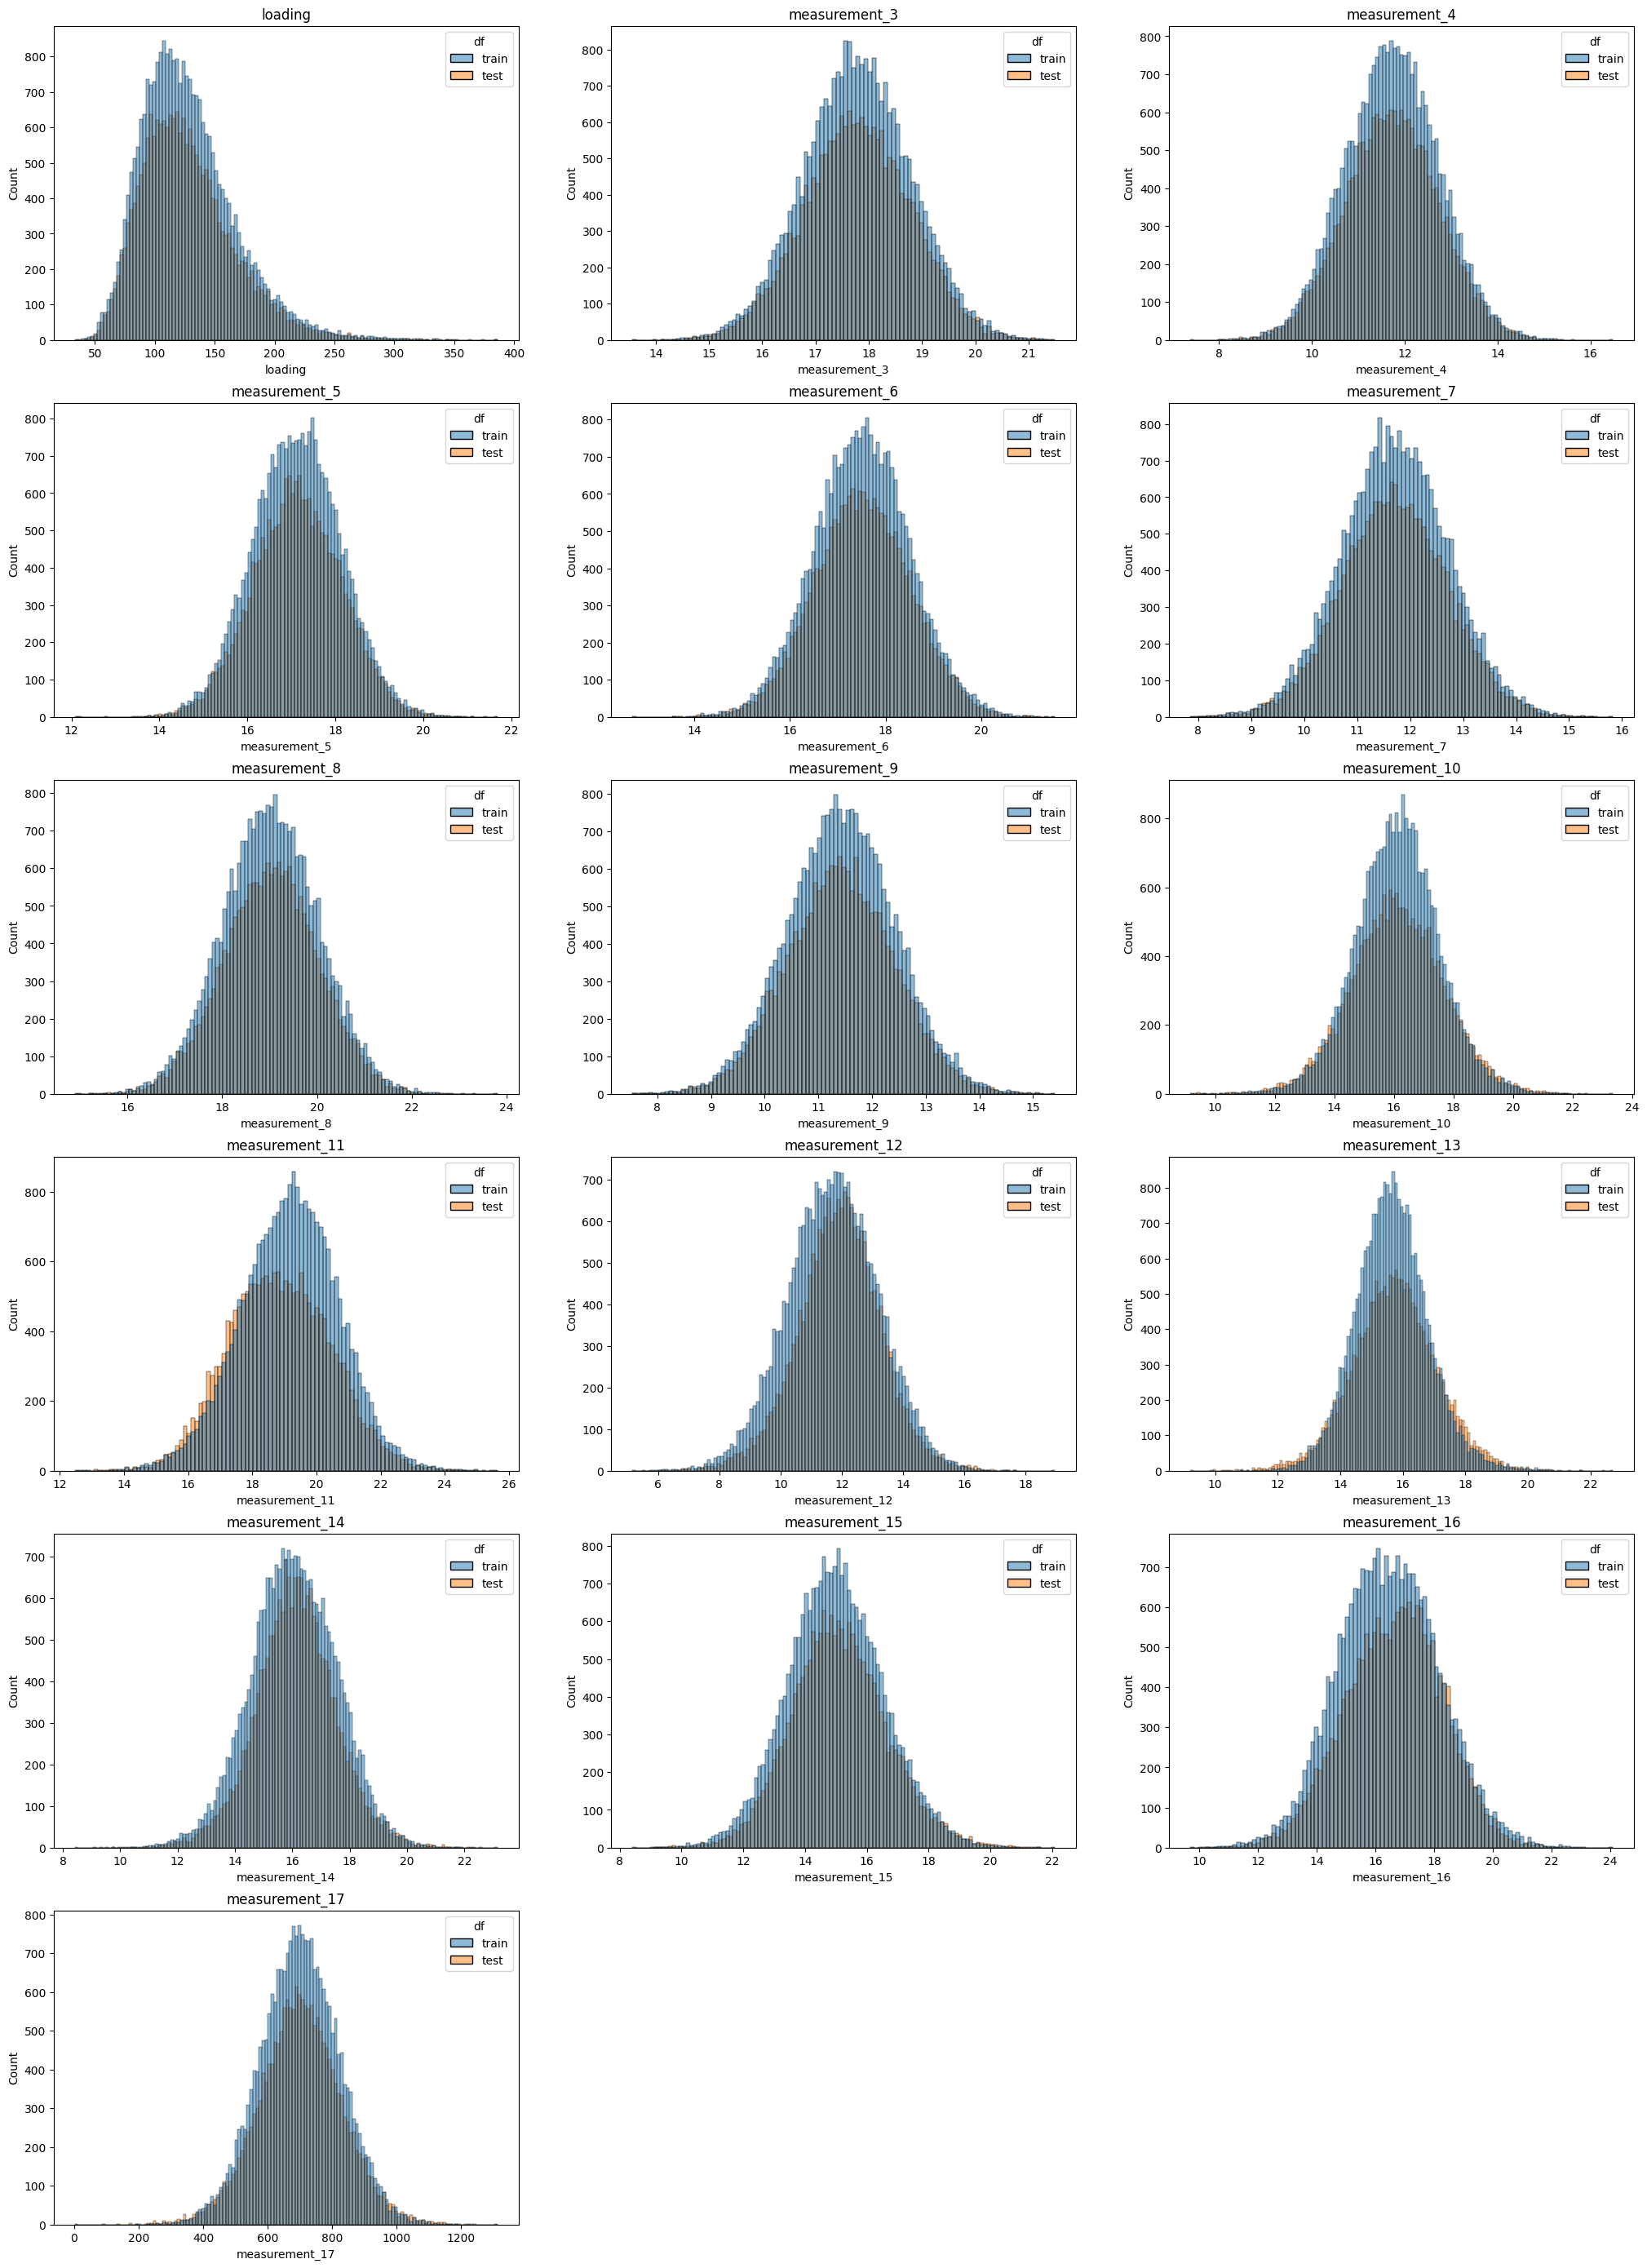

In [21]:
plt.subplots(figsize=(25,35))
train_df["df"] = "train"
test_df["df"] = "test"
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=pd.concat([train_df, test_df]).reset_index(drop=True), x=column,hue="df")
    plt.title(column)

- Observasi 
1. Semua feature measurement float terdistribusi dengan normal
2. Feature loading mempunyai distribusi skewed

### Distribution of integer value

C:\Users\Hakim\AppData\Local\Temp\ipykernel_2100\2506790809.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,i+1)


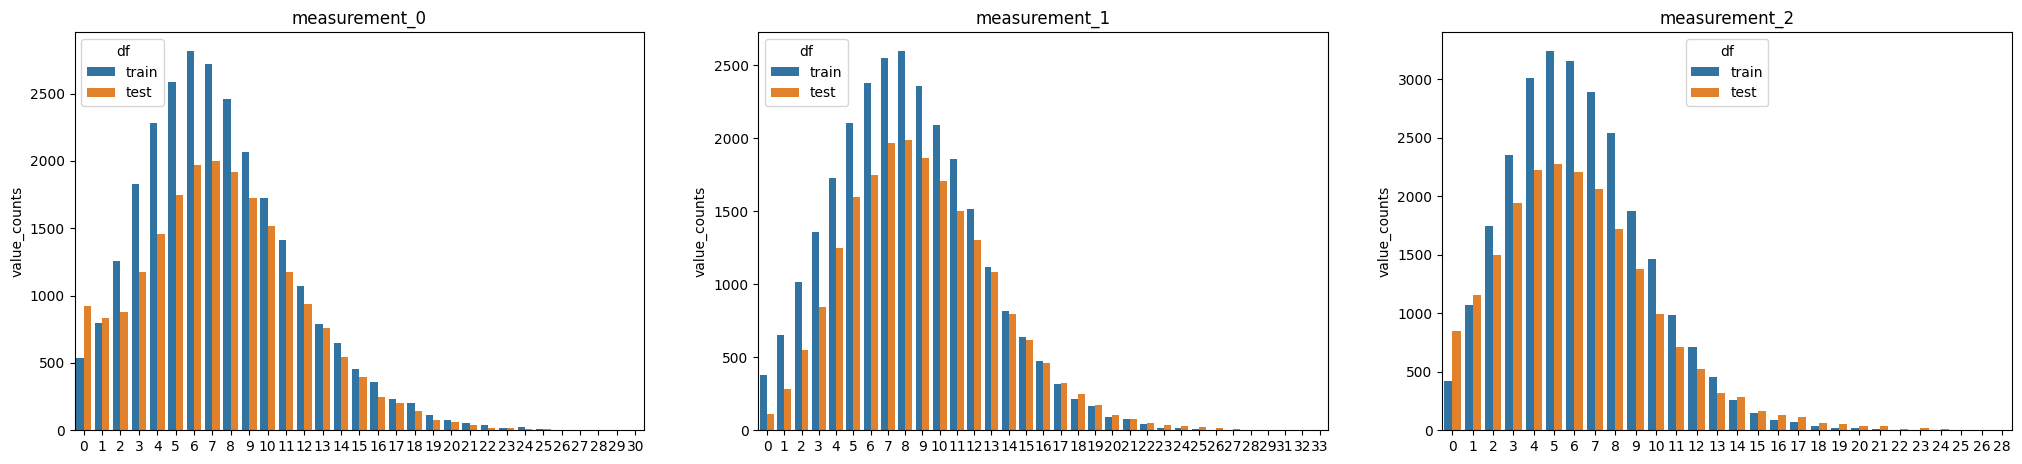

In [22]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = pd.concat([train_df, test_df])[[column,"df"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="df")
    ax.set_xlabel(None)
    plt.title(column)

- Observasi 
1. Distribusi pada train set dan test set untuk ketiga feature berbeda

### Correlations

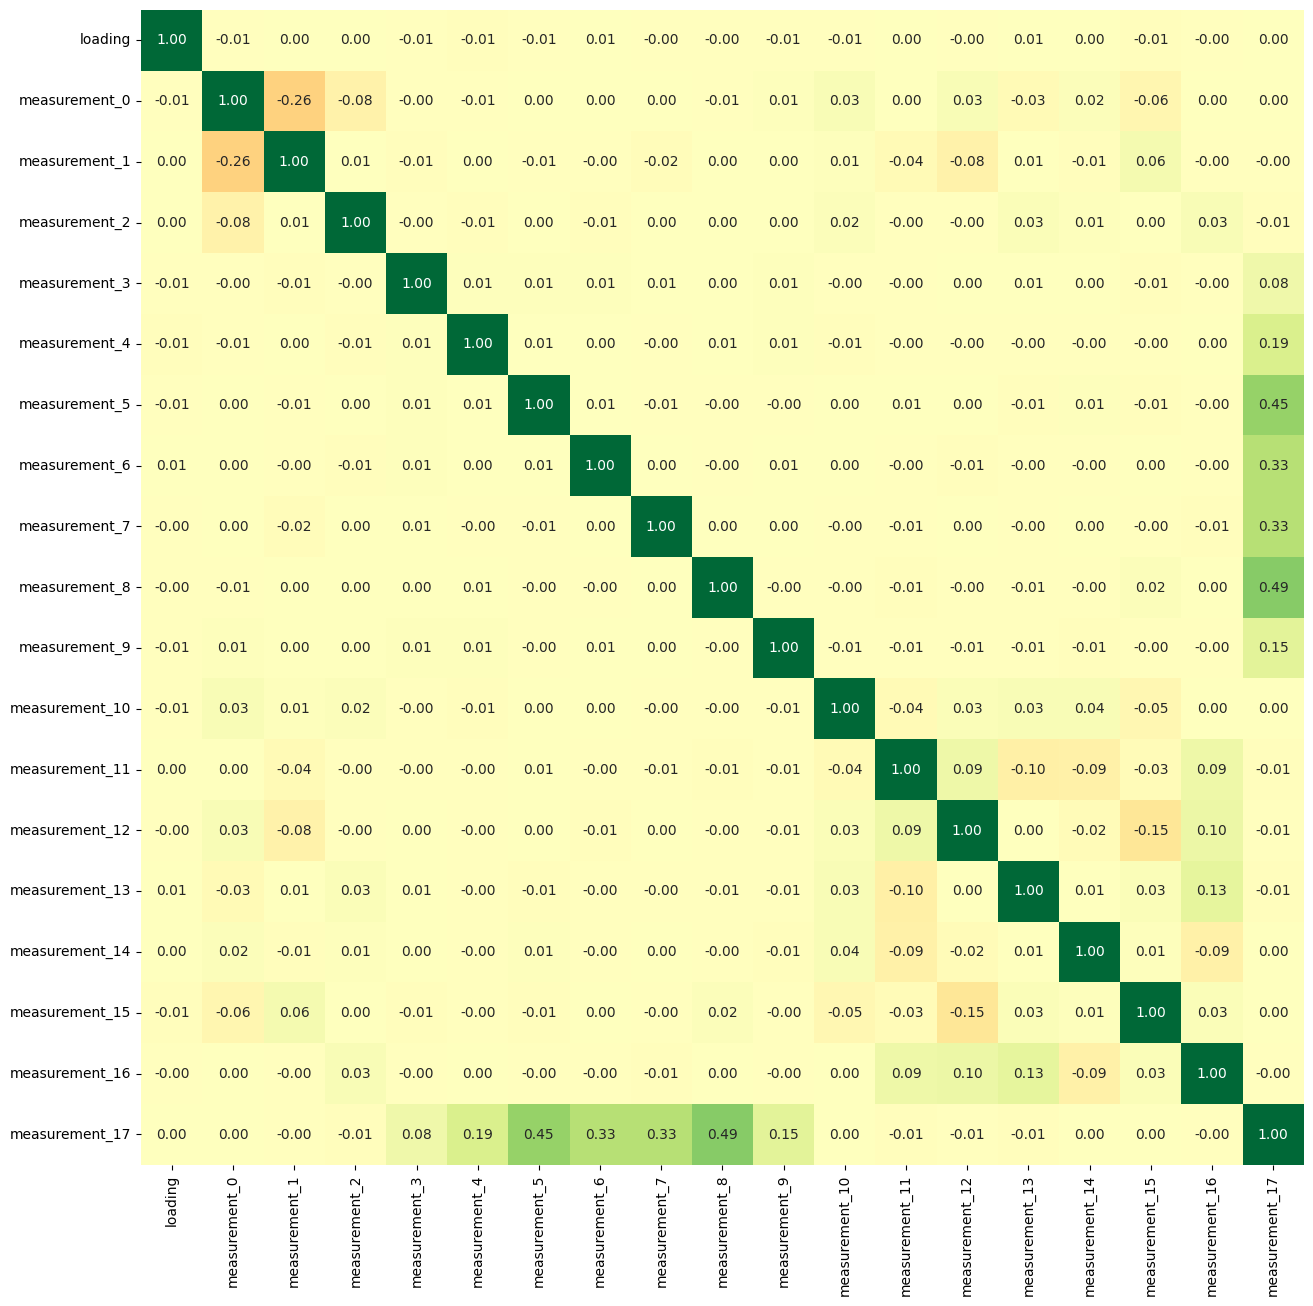

In [23]:
plt.subplots(figsize=(15,15))
sns.heatmap(train_df[["loading"] + measurement_cols].corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

- Observasi
1. Terdapat beberapa korelasi di antara feature measurement, khususnya measurement 17.

## Data Preparation

#### Dropping id, df, and failure columns

In [24]:
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

In [25]:
train_df = train_df.drop(columns=["df"])
test_df = test_df.drop(columns=["df"])

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [27]:
X = train_df.drop(columns="failure")
y = train_df["failure"]

X_test = test_df

## Feature Scaling

In [28]:
def _scale(train_data, val_data):
    scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[measurement_cols + ["loading"]])
    scaled_val = scaler.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = scaled_train
    new_val[measurement_cols + ["loading"]] = scaled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [29]:
def _impute(train_data, val_data):
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(train_data[measurement_cols + ["loading"]])
    
    filled_train = imputer.transform(train_data[measurement_cols + ["loading"]])
    filled_val = imputer.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = filled_train
    new_val[measurement_cols + ["loading"]] = filled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [30]:
def _ohe(train_data, val_data):    
    new_train = pd.get_dummies(train_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    new_val = pd.get_dummies(val_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    
    #columns are not currently the same, concat so that they are
    train_val = pd.concat([new_train, new_val]).fillna(0) #creates some empty columns, fill these with 0's
    
    #extract train and val again
    new_train = train_val.iloc[0:len(train_data)]
    new_val = train_val.iloc[len(train_data):]
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [31]:
def k_fold_cv(model,X,y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, roc_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train_df["product_code"])):
        print("===== fold", fold, "=====")
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        #impute
        X_train, X_val = _impute(X_train, X_val)
            
        #scale the data
        X_train, X_val = _scale(X_train, X_val)
            
        #encode categorical variables
        X_train, X_val = _ohe(X_train, X_val)
            
        # fit the model
        model.fit(X_train,y_train)
            
        #make predictions
        y_pred = model.predict_proba(X_val)[:,1]
            
        #save predictions for later
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        #evaluate performance
        roc_list.append(roc_auc_score(y_val,y_pred))
        print("roc auc", roc_auc_score(y_val,y_pred))
            
        #feature imporance
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    return feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val

In [32]:
model = GaussianNB()

In [48]:
y_true_list

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
y1 = pd.DataFrame(y_pred_list)
y2 = pd.DataFrame(y_true_list)
y1 = y1.rename(columns={0: 'pred'})
y2 = y2.rename(columns={0: 'true'})


In [68]:
combined_df = pd.concat([y1, y2], axis=1)

combined_df = pd.DataFrame(combined_df)


In [69]:

print(combined_df)

           pred  true
0      0.189456   0.0
1      0.236468   0.0
2      0.210515   0.0
3      0.255660   0.0
4      0.402960   1.0
...         ...   ...
26565  0.241757   0.0
26566  0.188864   0.0
26567  0.180186   0.0
26568  0.187095   0.0
26569  0.348778   0.0

[26570 rows x 2 columns]


In [87]:
combined_df[combined_df['pred'] >= 0.4]

pred  true
4      0.402960   1.0
29     0.433963   0.0
68     0.463299   0.0
86     0.425202   0.0
107    0.443787   1.0
...         ...   ...
26122  0.490158   1.0
26219  0.428547   1.0
26220  0.416647   0.0
26346  0.433342   1.0
26359  0.479226   1.0

[258 rows x 2 columns]

In [33]:
%%time
feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

===== fold 0 =====
roc auc 0.580254738588613
===== fold 1 =====
roc auc 0.5778840158237452
===== fold 2 =====
roc auc 0.590481593625065
===== fold 3 =====
roc auc 0.5887410071942446
===== fold 4 =====
roc auc 0.586055557611088
CPU times: total: 906 ms
Wall time: 2.22 s


In [90]:
feature_imp

[]

In [34]:
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean ROC AUC Score: 0.5846833825685511


C:\Users\Hakim\AppData\Local\Temp\ipykernel_2100\295709112.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: Futu

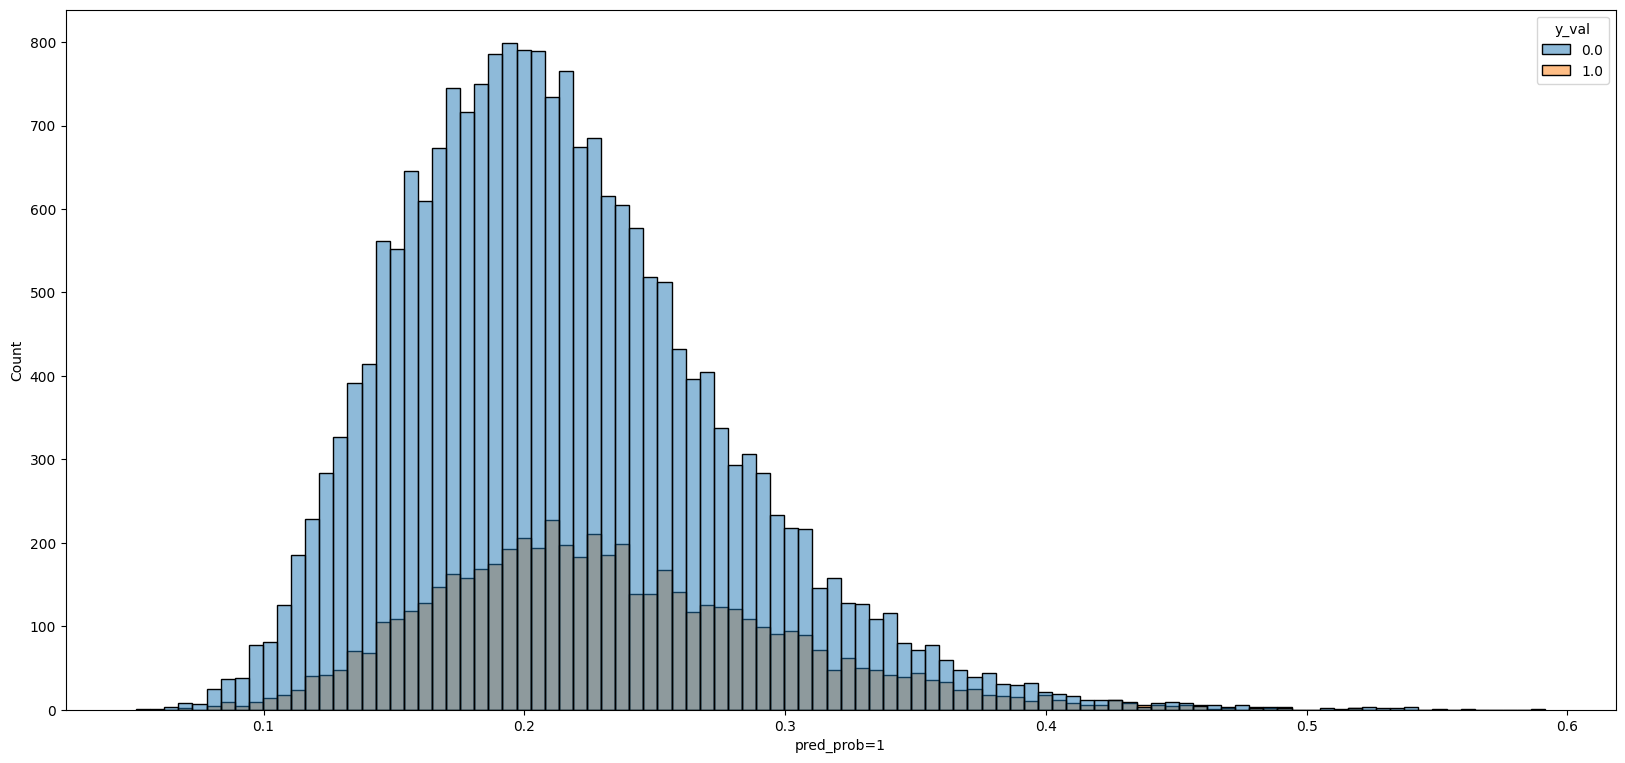

In [35]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", bins = 100)

## Inference

In [43]:
X_train = X.sample(int(0.8*len(X)))
y_train = y.loc[X_train.index]
y_train.is_unique

False

In [88]:
def inference(X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]
        print (y_train)
        X_train, X_te = _impute(X_train, X_test)
        
        print(X_te)

        #scale the data
        X_train, X_te = _scale(X_train, X_te)

        print(X_te)
        #encode categorical variables
        X_train, X_te = _ohe(X_train, X_te)
        print(X_te)
        model = GaussianNB()
        # fit the model
        model.fit(X_train,y_train)

        #make predictions
        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [89]:
%%time
predictions_df = inference(X, X_test, 500)

20622    0
23545    0
21296    0
25413    1
8389     0
        ..
5970     0
12452    0
7337     0
11350    0
7016     0
Name: failure, Length: 21256, dtype: int64
      product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
0                F   119.57  material_5  material_6            6            4   
1                F   113.51  material_5  material_6            6            4   
2                F   112.16  material_5  material_6            6            4   
3                F   112.72  material_5  material_6            6            4   
4                F   208.00  material_5  material_6            6            4   
...            ...      ...         ...         ...          ...          ...   
20770            I   144.74  material_7  material_5            9            5   
20771            I    74.53  material_7  material_5            9            5   
20772            I    67.73  material_7  material_5            9            5   
20773            I   126.1

In [100]:
predictions_df.head()

0        1        2        3        4        5        6        7  \
0   6104.0   5084.0   6858.0   4904.0   6137.0   6192.0   4327.0   6450.0   
1   1755.0   1786.0   2034.0   1916.0   1456.0   1496.0   1341.0   1455.0   
2   3437.0   2384.0   3334.0   2501.0   2246.0   3000.0   1902.0   4094.0   
3   2608.0   3131.0   1843.0   2670.0   2807.0   2518.0   2379.0   3657.0   
4  15714.0  15935.0  14092.0  15909.0  13970.0  14656.0  13639.0  16456.0   

         8        9  ...      491      492      493      494      495  \
0   5274.0   4495.0  ...   4511.0   6787.0   5420.0   6545.0   6525.0   
1   1674.0   1580.0  ...   2074.0   1100.0   1895.0   1239.0   1882.0   
2   2515.0   2367.0  ...   2115.0   2545.0   2632.0   3247.0   2671.0   
3   3045.0   2164.0  ...   1540.0   2950.0   3288.0   2284.0   2375.0   
4  15100.0  15245.0  ...  13703.0  14645.0  15133.0  16336.0  16594.0   

       496      497      498      499       mean  
0   5820.0   6225.0   6259.0   5064.0   5456.117  
1   2582.0   1260.0   2830.0   1523.0   1716.069  
2   2364.0   3586.0   3571.0   2444.0   2578.311  
3   1835.0   1892.0   1996.0   2344.0   2355.780  
4  14883.0  14280.0  16094.0  13034.0  14744.867  

[5 rows x 501 columns]

In [101]:
pred_df = pd.DataFrame(y_pred_list, columns=["pred_prob"])
pred_df["rank"] = pred_df.rank()
display(pred_df.head(10))

print("roc auc using prediction probabilities:", roc_auc_score(y_true_list, pred_df["pred_prob"]))
print("roc auc using predicted probabilities ranks:", roc_auc_score(y_true_list, pred_df["rank"]))

pred_prob     rank
0   0.189456   9518.0
1   0.236468  17575.0
2   0.210515  13340.0
3   0.255660  20095.0
4   0.402960  26337.0
5   0.207052  12717.0
6   0.204486  12260.0
7   0.228707  16384.0
8   0.211972  13615.0
9   0.225947  15937.0

roc auc using prediction probabilities: 0.5824259524418327
roc auc using predicted probabilities ranks: 0.5824259524418327


## Submission

In [119]:
sub_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)
sub_df["failure"] = predictions_df["mean"]
sub_df.to_csv('../submissions/submission_7.csv', index=False)